In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
#verify tensorflow version
print(f"Tensorflow version:{tf.__version__}")

Tensorflow version:2.16.1


In [10]:
#LOAD AND PREPROCESS DATA
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=10000)

#display a sample review
print(f"Sample review (tokenized):{x_train[0]}")
print(f"Sample label: {y_train[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step
Sample review (tokenized):[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 53

In [11]:
#preprocess the data
max_len=200
x_train=pad_sequences(x_train,
                      maxlen=max_len, padding='post', truncating='post')
x_test=pad_sequences(x_test,
                     maxlen=max_len, padding='post', truncating='post')

print(f"Shape of x_train:{x_train.shape}")
print(f"Shape of x_test:{x_test.shape}")

Shape of x_train:(25000, 200)
Shape of x_test:(25000, 200)


In [13]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
model=Sequential([Embedding(input_dim=10000, output_dim=32), LSTM(64, return_sequences=True), LSTM(32), Dense(64, activation='relu'),
                  Dropout(0.5), Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
#train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 203ms/step - accuracy: 0.5062 - loss: 0.6932 - val_accuracy: 0.5636 - val_loss: 0.6749
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.5444 - loss: 0.6847 - val_accuracy: 0.5062 - val_loss: 0.6909
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 194ms/step - accuracy: 0.5044 - loss: 0.6923 - val_accuracy: 0.4986 - val_loss: 0.6910
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 194ms/step - accuracy: 0.5034 - loss: 0.6912 - val_accuracy: 0.4986 - val_loss: 0.6907
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.5111 - loss: 0.6926 - val_accuracy: 0.5062 - val_loss: 0.6909


In [15]:
#evaluate the model
loss, accuracy=model.evaluate(x_test,y_test)
print(f"Test accuracy:{accuracy*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5073 - loss: 0.6907
Test accuracy:50.00%


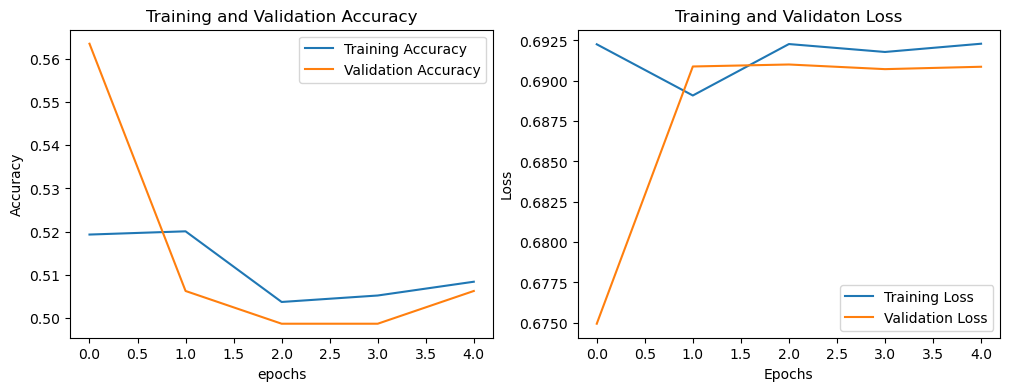

In [16]:
#visualize the training process
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

#plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validaton Loss')

plt.show()

In [18]:
#make predictions
sample_review="The movie was fantastic! I really enjoyed it."
sample_review_tokenized=tf.keras.preprocessing.text.text_to_word_sequence(sample_review)
word_index=imdb.get_word_index()
sample_review_seq=[word_index[word]for word in sample_review_tokenized if word in word_index]
sample_review_seq=pad_sequences([sample_review_seq], maxlen=max_len, padding='post', truncating='post')
prediction=model.predict(sample_review_seq)
print(f"Prediction (positive review): {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction (positive review): 0.4957585632801056
